In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


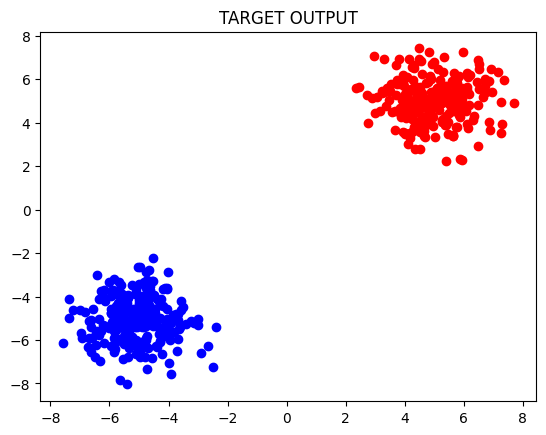

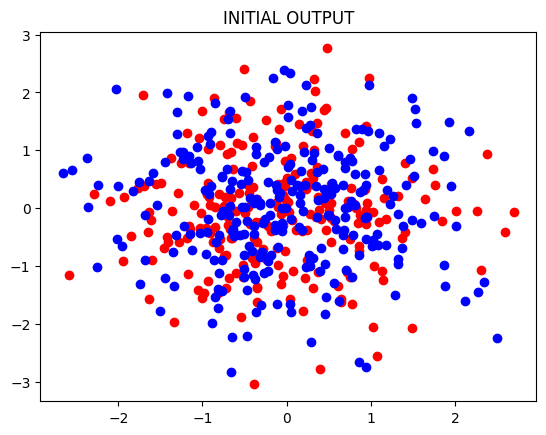

In [39]:
a, b = make_blobs(n_samples=500, centers=[[5, 5], [-5, -5]], n_features=2, random_state=0)  # Target coordinates
plt.scatter(a[b == 0][:, 0], a[b == 0][:, 1], color='red', label='red') #(x,y) values corresponding to 0 = red, 1 = blue
plt.scatter(a[b == 1][:, 0], a[b == 1][:, 1], color='blue', label='blue')
plt.title("TARGET OUTPUT")
plt.show()

np.random.seed(0)
x = np.random.randn(500, 2)
y = np.random.randint(0, 2, size=500)

#for parameters>2 project all onto 2 dimentions X=[500,2] Y=[]
# print(x)
# print(y)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', label='red') #(x,y) values corresponding to 0 = red, 1 = blue
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', label='blue')
plt.title("INITIAL OUTPUT")
plt.show()

In [40]:
InputTensor = torch.FloatTensor(x)
TargetTensor = torch.FloatTensor(a) #TARGET NEURAL NETWORK SHOULD REACH THIS

# print(InputTensor)
# print(TargetTensor)

L1weight = torch.randn((10, 2), requires_grad=True) 
L1bias = torch.randn(10, requires_grad=True) 
#(10,2) 

L2weight = torch.randn((10, 10), requires_grad=True) 
L2bias = torch.randn(10, requires_grad=True) 
#(10,10)

L3weight = torch.randn((2, 10), requires_grad=True) 
L3bias = torch.randn(2, requires_grad=True)  
#(2,10)

#forward pass
def forward(x):
    x = torch.matmul(x, L1weight.T) + L1bias #(500,2) x (2,10)
    x = torch.tanh(x)
    x = torch.matmul(x, L2weight.T) + L2bias
    x = torch.tanh(x)
    x = torch.matmul(x, L3weight.T) + L3bias
    return x



In [45]:




epochs = 50
for epoch in range(epochs):
    output = forward(InputTensor) 
    
    loss = torch.mean((output - TargetTensor) ** 2) #MSE loss
    loss.backward()
    # Manually update weights and biases using gradient descent
    learning_rate = 0.05
    
    with torch.no_grad():
        L1weight -= learning_rate * L1weight.grad
        L1bias -= learning_rate * L1bias.grad
        L2weight -= learning_rate * L2weight.grad
        L2bias -= learning_rate * L2bias.grad
        L3weight -= learning_rate * L3weight.grad
        L3bias -= learning_rate * L3bias.grad
    
    # Clear gradients after the update
    L1weight.grad.zero_()
    L1bias.grad.zero_()
    L2weight.grad.zero_()
    L2bias.grad.zero_()
    L3weight.grad.zero_()
    L3bias.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 24.339282989501953


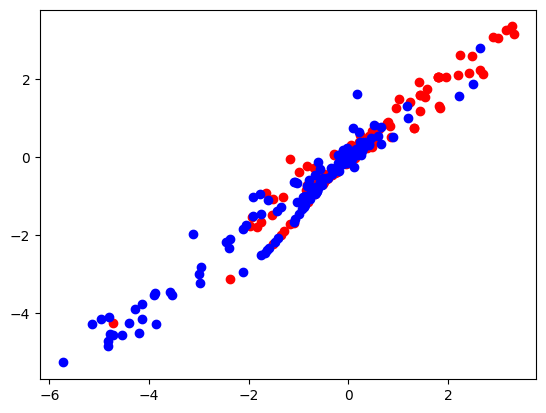

In [46]:
with torch.no_grad():
    transformed_points = forward(InputTensor).numpy()

# Plot the generated moons
plt.scatter(transformed_points[b == 0, 0], transformed_points[b == 0, 1], color='red')
plt.scatter(transformed_points[b == 1, 0], transformed_points[b == 1, 1], color='blue')
plt.show()

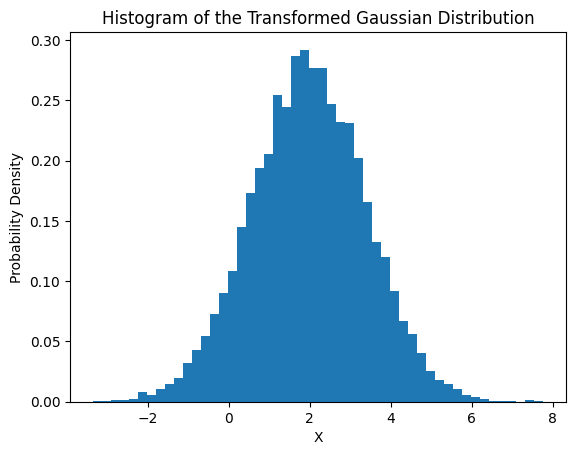

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate 10000 random numbers uniformly distributed between 0 and 1
U = np.random.rand(10000)

# Apply the transformation
X = 2 + np.sqrt(2) * norm.ppf(U)

# Plot the histogram
plt.hist(X, bins=50, density=True)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Histogram of the Transformed Gaussian Distribution')
plt.show()